In [10]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
def quota(inv_y, inv_yhat,name):
    rmse_ = sqrt(mean_squared_error(inv_y, inv_yhat))
    mae_=mean_absolute_error(inv_y, inv_yhat)
    r2_ = r2_score(inv_y, inv_yhat)
    print(name,'的rmse:', rmse_, ' mae:', mae_, ' R2:', r2_)

In [12]:
data0=loadmat('结果/lstm_result.mat')['true']
data1=loadmat('结果/emd-lstm_result.mat')['pred'].T
data2=loadmat('结果/eemd-lstm_result.mat')['pred'].T
data3=loadmat('结果/vmd-lstm_result.mat')['pred'].T
data4=loadmat('结果/emd-delm_result.mat')['pred']
data5=loadmat('结果/eemd-delm_result.mat')['pred']
data6=loadmat('结果/vmd-delm_result.mat')['pred']
data7=loadmat('结果/vmd-hho-delm_result.mat')['pred']

In [13]:
print(data0.shape,data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape,data7.shape)

(288, 1) (288, 1) (288, 1) (288, 1) (288, 1) (288, 1) (288, 1) (288, 1)


In [14]:
quota(data0,data1,'EMD-LSTM')
quota(data0,data2,'EEMD-LSTM')
quota(data0,data3,'VMD-LSTM')
quota(data0,data4,'EMD-DELM')
quota(data0,data5,'EEMD-DELM')
quota(data0,data6,'VMD-DELM')
quota(data0,data7,'VMD-HHO-DELM')

EMD-LSTM 的rmse: 22.32122753129709  mae: 17.58434810148578  R2: 0.9812925648668933
EEMD-LSTM 的rmse: 14.251421839644276  mae: 11.334026047089639  R2: 0.9923740405841375
VMD-LSTM 的rmse: 9.206816538327633  mae: 7.548470173829021  R2: 0.9968172899359452
EMD-DELM 的rmse: 20.1651828088107  mae: 16.556946753068814  R2: 0.9847319903402832
EEMD-DELM 的rmse: 12.731570127696493  mae: 10.07353667451607  R2: 0.9939138586836432
VMD-DELM 的rmse: 7.786796245259399  mae: 6.067461467512609  R2: 0.9977233528778435
VMD-HHO-DELM 的rmse: 6.415713817050216  mae: 4.997224071572571  R2: 0.9984545033582233


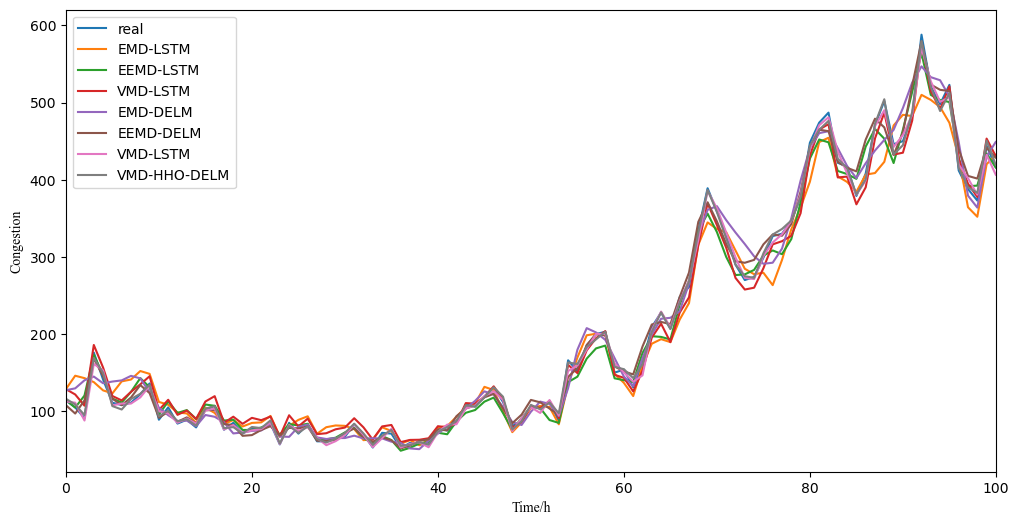

In [15]:
# In[7] 画图
plt.figure(figsize=(12,6))
plt.plot(data0,'-',label='real')
plt.plot(data1,'-',label='EMD-LSTM')
plt.plot(data2,'-',label='EEMD-LSTM')
plt.plot(data3,'-',label='VMD-LSTM')
plt.plot(data4,'-',label='EMD-DELM')
plt.plot(data5,'-',label='EEMD-DELM')
plt.plot(data6,'-',label='VMD-LSTM')
plt.plot(data7,'-',label='VMD-HHO-DELM')

plt.xlim((0,100))
# plt.grid()
plt.legend()
plt.xlabel('Time/h',fontdict={"family":"Times New Roman"})
plt.ylabel('Congestion',fontdict={"family":"Times New Roman"})
plt.savefig('figure/各预测方法对比结果图.png')
plt.show()